<a href="https://colab.research.google.com/github/DipendraThapaMagar/CS625-Final-Project/blob/main/CS625(Final_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
The U.S. Health Insurance dataset, sourced from Kaggle’s open data repository (https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset), contains detailed records of 1,338 individuals enrolled in health insurance plans. Each record includes demographic attributes such as age, sex, body mass index (BMI), smoking status, number of children, geographic region, and the corresponding annual insurance charges.

The purpose of this project is to perform an in-depth exploratory data analysis (EDA) and hypothesis-driven investigation to understand the factors influencing insurance charges. Using Seaborn and Plotly for visual analysis and statistical testing techniques (e.g., t-tests), the project aims to uncover meaningful relationships and patterns within the data.

The central questions we address include:

Q1. Do regions have some difference in insurance charges between males and females?

Q2. How does smoking status impact insurance charges across different age groups?

These insights not only demonstrate practical data analysis skills but also simulate how insurance companies can use analytics to support data-driven underwriting decisions and pricing strategies.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/odu-cs625-datavis/Spring25-asv-DipendraThapaMagar/refs/heads/main/Projects/insurance.csv?token=GHSAT0AAAAAAC5KUHYOH4C2F2ILZNYAWQPS2AFCDWA")


# Data Cleaning


In [ ]:
# Check for missing values
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


This means there is no any missing and null values.

In [ ]:
# Check for duplicates
print("Duplicate rows:", data.duplicated().sum())

Duplicate rows: 1


In [ ]:
# Remove duplicates
df = data.drop_duplicates()

# Optional: Check row count before and after
print("Original:", data.shape[0], "rows")
print("After removing duplicates:", df.shape[0], "rows")


Original: 1338 rows
After removing duplicates: 1337 rows


In [ ]:
print(df.shape)
print(df.head())

(1337, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


# Exploratory Data Analysis

In [ ]:
# Basic info
print(df.shape)
print(df.info())
print(df.describe())

(1337, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.71745

## Univariate Analysis

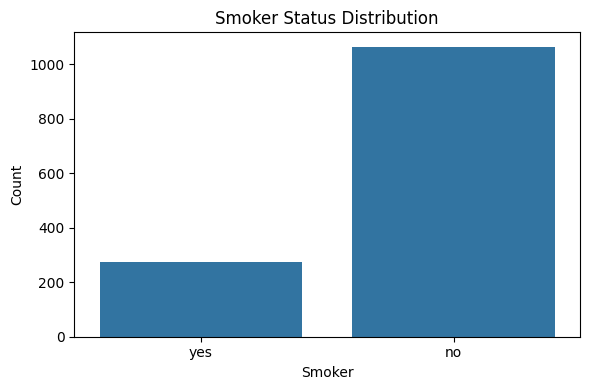

In [ ]:
plt.figure(figsize=(6, 4))  # wider figure to avoid overlap
sns.countplot(x='smoker', data=df)
plt.xticks(rotation=0)  # rotate if needed: use 0, 45, or 90
plt.title('Smoker Status Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


There are more non-smokers in dataset.

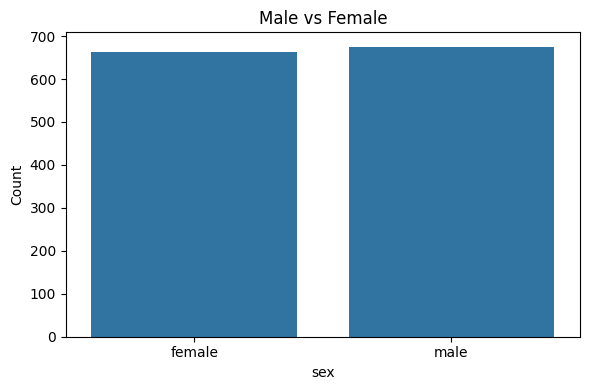

In [ ]:
plt.figure(figsize=(6, 4))  # wider figure to avoid overlap
sns.countplot(x='sex', data=df)
plt.xticks(rotation=0)  # rotate if needed: use 0, 45, or 90
plt.title('Male vs Female')
plt.xlabel('sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Male and female are in same ratio.

## Bivariate Analysis

<Axes: xlabel='smoker', ylabel='charges'>

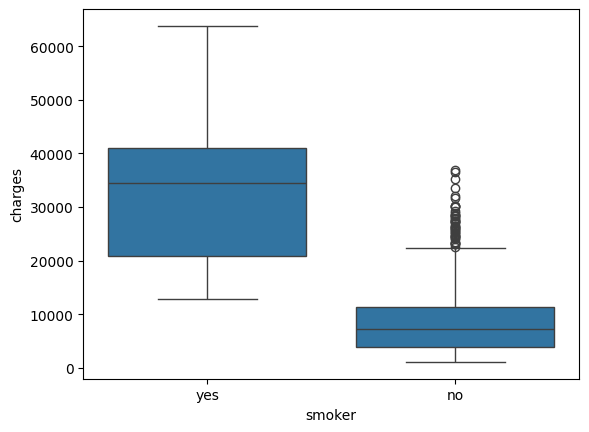

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)


**Smokers (yes):**
* The median charge (middle line in the box) is around $35,000-$37,000, much higher than non-smokers.
* The interquartile range (IQR) — the box part — is wider, indicating greater variability in charges.
* Some values exceed $60,000, showing that smokers are more likely to pay very high premiums.

**Smokers (no):**
* The median charge is under $10,000, indicating significantly lower costs.
* The box is much smaller, meaning charges for non-smokers are less variable.
* There are some outliers, but they are still much lower than those for smokers.

<Axes: xlabel='age', ylabel='charges'>

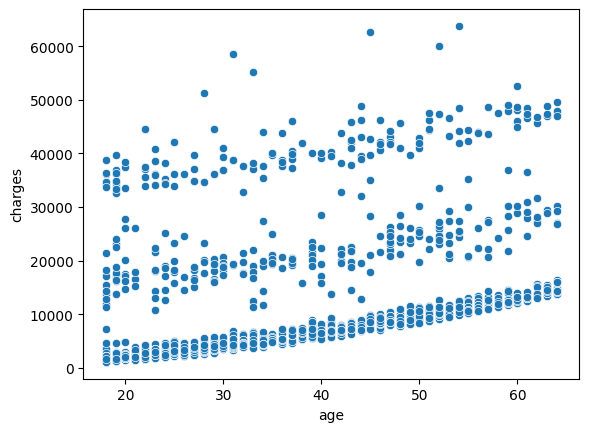

In [ ]:
sns.scatterplot(x='age', y='charges', data=df)

**Positive trend:** As age increases, insurance charges tend to increase.

**Multiple Horizontal Clusters:** Distinct horizontal bands or gaps, especially above the $10,000 and 30,000 charge levels.These clusters suggest subgroups within the same age group - possibly influenced by smoking, BMI, or number of children.

In [ ]:
pd.crosstab(df['region'], df['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,266,58
southeast,273,91
southwest,267,58


## Correlation Matrix

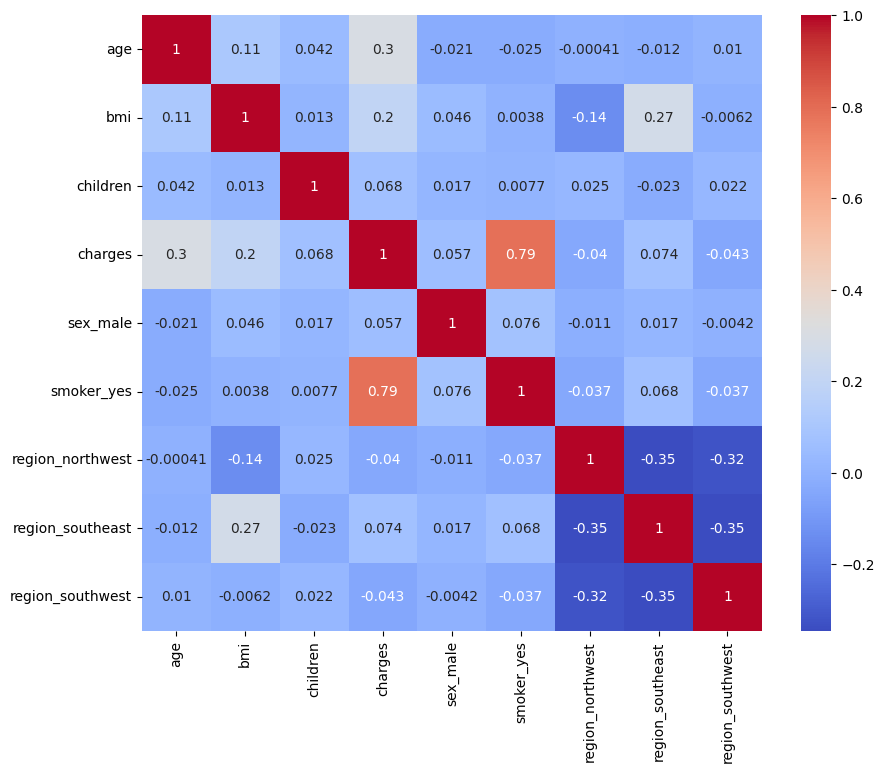

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

encoded_data = pd.get_dummies(data, drop_first=True)
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Group-Level Aggregation

In [ ]:
df.groupby('region')['charges'].mean().sort_values()

,charges
region,
southwest,12346.937377
northwest,12450.840844
northeast,13406.384516
southeast,14735.411438


# Visualization Idioms

# Do regions have some difference in insurance charges between males and females?

## Box plot

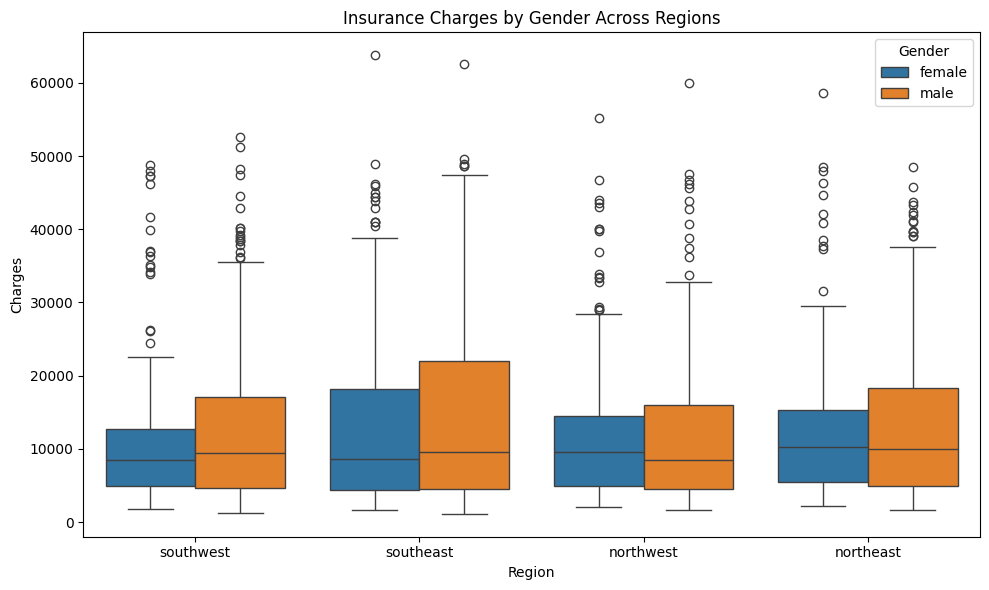

In [ ]:
# Plot: Insurance charges by sex across different regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="region", y="charges", hue="sex")
plt.title("Insurance Charges by Gender Across Regions")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Load dataset if not already
# df = pd.read_csv('insurance.csv')

# Create boxplot with default outlier handling
fig = px.box(
    df,
    x="region",
    y="charges",
    color="sex",
    title="Insurance Charges by Gender Across Regions",
    labels={
        "region": "Region",
        "charges": "Insurance Charges ($)",
        "sex": "Gender"
    },
    points="outliers",  # 🔹 Show only outliers, not all data points
    hover_data=["age", "bmi", "children", "smoker"]
)

# Customize layout
fig.update_layout(
    title={
        'text': "Insurance Charges by Gender Across Regions",
        'x': 0.5,
        'xanchor': 'center'
    },
    template="plotly_white",
    boxmode="group",
    yaxis_title="Insurance Charges ($)",
    xaxis_title="Region",
    legend_title="Gender",
    hovermode="closest",
    dragmode=False  # Disable zoom/pan
)

# Hide mode bar
fig.show(config={'displayModeBar': False})


## Choropleth Map

In [ ]:
# Define example states for each region
region_to_states = {
    'northeast': ['NY', 'PA', 'MA'],
    'southeast': ['FL', 'GA', 'NC'],
    'southwest': ['TX', 'AZ', 'NM'],
    'northwest': ['WA', 'OR', 'ID']
}

# Function to assign a random state based on region
def assign_state(region):
    return np.random.choice(region_to_states.get(region, ['NA']))

# Apply the function to create the new 'state' column
df['state'] = df['region'].apply(assign_state)

# Preview the updated dataset
print(df.head())

# Optional: Save the updated dataset to a new CSV file
df.to_csv("insurance_with_states.csv", index=False)

   age     sex     bmi  children smoker     region      charges state
0   19  female  27.900         0    yes  southwest  16884.92400    TX
1   18    male  33.770         1     no  southeast   1725.55230    FL
2   28    male  33.000         3     no  southeast   4449.46200    GA
3   33    male  22.705         0     no  northwest  21984.47061    ID
4   32    male  28.880         0     no  northwest   3866.85520    WA


<ipython-input-24-5a6d663b93d4>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px

# Group by state and sex to get average charges
gender_avg = df.groupby(['state', 'sex'])['charges'].mean().unstack()

# Calculate the difference (male - female)
gender_avg['difference'] = gender_avg['male'] - gender_avg['female']
gender_avg = gender_avg.reset_index()

# Create hover text manually
gender_avg['hover_text'] = (
    "State: " + gender_avg['state'] + "<br>" +
    "Male Avg: $" + gender_avg['male'].round(2).astype(str) + "<br>" +
    "Female Avg: $" + gender_avg['female'].round(2).astype(str) + "<br>" +
    "Difference: $" + gender_avg['difference'].round(2).astype(str)
)

# Plot choropleth with custom hover info
fig = px.choropleth(
    gender_avg,
    locations='state',
    locationmode='USA-states',
    color='difference',
    color_continuous_scale='RdBu',
    range_color=[-5000, 5000],
    scope='usa',
    labels={'difference': 'Male - Female ($)'},
    title='Gender-Based Insurance Charge Difference by State',
    hover_name='state',
    hover_data={'difference': False, 'hover_text': True, 'state': False}
)

# Apply clean hover text
fig.update_traces(hovertemplate=gender_avg['hover_text'])

# Layout improvements
fig.update_layout(
    title={
        'text': 'Gender-Based Insurance Charge Difference by State',
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar=dict(
        title='Male - Female<br>Avg Charges ($)'
    )
)

fig.show()


## T-test

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Prepare results table
results = []

# Loop through each region and run t-test
for region in df['region'].unique():
    subset = df[df['region'] == region]
    male_charges = subset[subset['sex'] == 'male']['charges']
    female_charges = subset[subset['sex'] == 'female']['charges']

    t_stat, p_val = ttest_ind(male_charges, female_charges, equal_var=False)
    results.append({
        'Region': region.title(),
        'Avg Charges (Male)': round(male_charges.mean(), 2),
        'Avg Charges (Female)': round(female_charges.mean(), 2),
        'P-Value': round(p_val, 4),
        'Significant?': 'Yes' if p_val < 0.05 else 'No'
    })

# Create summary table
summary_df = pd.DataFrame(results)
print(summary_df)


      Region  Avg Charges (Male)  Avg Charges (Female)  P-Value Significant?
0  Southwest            13412.88              11274.41   0.0952           No
1  Southeast            15879.62              13499.67   0.1021           No
2  Northwest            12421.09              12479.87   0.9620           No
3  Northeast            13854.01              12953.20   0.4719           No


These results support the visual observation — gender-based differences in charges are not statistically significant across regions (p > 0.05).

# How does smoking status impact insurance charges across different age groups?

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Round ages for grouping
df['age_round'] = df['age'] // 2 * 2

# Grouped average charges
avg_charges = df.groupby(['age_round', 'smoker'])['charges'].mean().reset_index()

# Create line chart with markers
fig = px.line(
    avg_charges,
    x='age_round',
    y='charges',
    color='smoker',
    markers=True,
    title="Age vs. Insurance Charges by Smoking Status",
    labels={
        'age_round': 'Age',
        'charges': 'Average Charges ($)',
        'smoker': 'Smoker Status'
    }
)

# Add sampled data points (10%) to keep chart clean
for smoker_status in df['smoker'].unique():
    subset = df[df['smoker'] == smoker_status].sample(frac=0.1, random_state=1)
    fig.add_trace(
        go.Scatter(
            x=subset['age'],
            y=subset['charges'],
            mode='markers',
            name=f'Sample Points ({smoker_status})',
            marker=dict(size=5, opacity=0.3),
            hovertemplate=(
                "<b>Age:</b> %{x}<br>" +
                "<b>Charges:</b> $%{y:.2f}<br>" +
                f"<b>Smoker:</b> {smoker_status}<extra></extra>"
            ),
            showlegend=False
        )
    )

# Limit y-axis to $45,000 max
fig.update_yaxes(range=[0, 45000])

# Final layout settings with centered title
fig.update_layout(
    title={
        'text': "Age vs. Insurance Charges by Smoking Status",
        'x': 0.5,
        'xanchor': 'center'
    },
    hovermode="closest",
    template="plotly_white"
)
fig.show()


<ipython-input-27-5090e6540a6f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Linear Regression Model vs Random Forest to predict actual charges
To predict insurance charges more accurately other factors like **age, bmi, children, sex, smoker, and region** should also considered.

Model Performance Comparison:
Linear Regression -> MSE: 35478020.68, R²: 0.807
Random Forest     -> MSE: 22095988.24, R²: 0.880


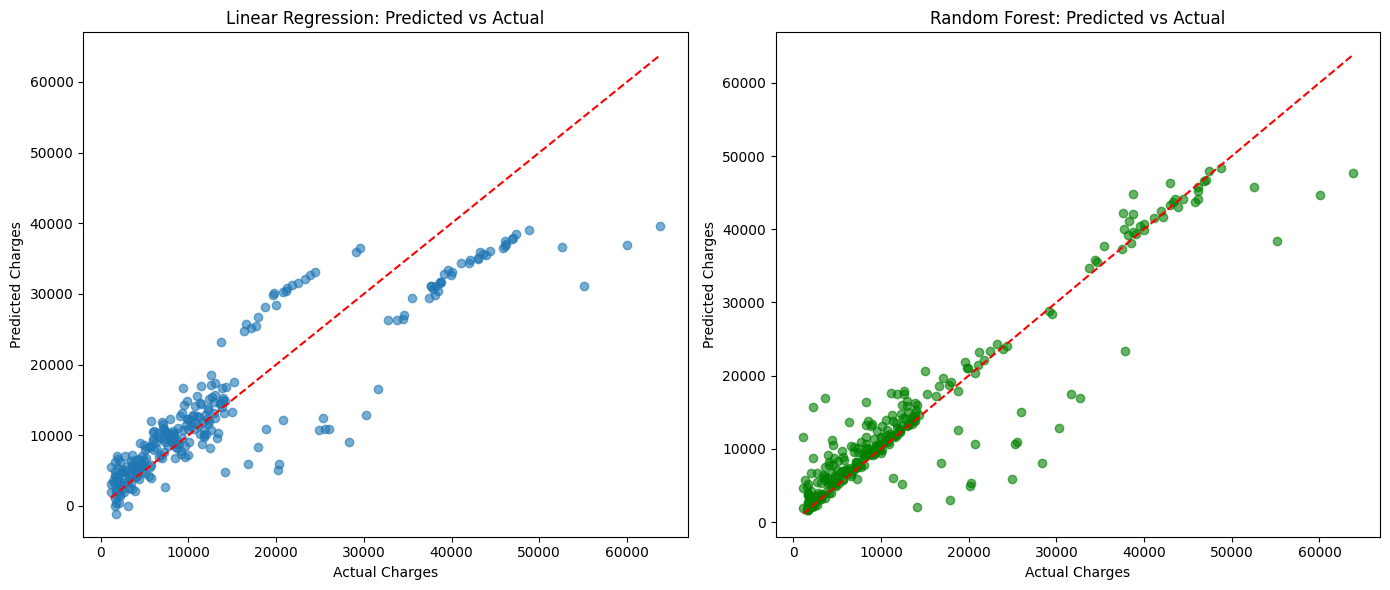

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


# Define features and target
X = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]
y = df['charges']

# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
    ],
    remainder='passthrough'  # Keep numerical columns
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Linear Regression Model --------------------
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# -------------------- Random Forest Model --------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# -------------------- Print Evaluation --------------------
print("Model Performance Comparison:")
print(f"Linear Regression -> MSE: {mse_lr:.2f}, R²: {r2_lr:.3f}")
print(f"Random Forest     -> MSE: {mse_rf:.2f}, R²: {r2_rf:.3f}")

# -------------------- Plot Predicted vs Actual --------------------
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# Random Forest Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()


Random Forest performing better than Linear Regression.

# Conclusion
* Gender alone does not explain much of the variation in insurance charges when viewed across broad regions.
* Smoking status has a very strong effect, especially as individuals age. This is a key variable influencing health risk and, in turn, insurance cost.
* Statistical testing confirms the visual observations, especially regarding lack of gender-based significance.
* The box plots were useful for comparing group distributions and spotting outliers.
* The choropleth map offered a state-level overview, enhanced with dropdowns and embedded labels for an interactive experience.

* The line interaction plot captured nuanced patterns like the increasing charge gap between smokers and non-smokers with age.

These visualizations provide actionable insights for both insurers and policyholders. They emphasize the importance of lifestyle factors like smoking and the compounding effect of age on insurance premiums.

# References
- Reference 1, Dataset - [US Health Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)
- Reference 2, T-test: https://www.jmp.com/en/statistics-knowledge-portal/t-test
- Reference 3, Seaborn Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/examples/horizontal_boxplot.html)
- Reference 4, Matplotlib Documentation: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/gallery/index.html)
- Reference 5, Google
- Reference 6, ChatGpt
- Reference 7, Class Lecture notes
- Reference 8, Scikit Learn: https://scikit-learn.org/stable/modules/linear_model.html
- Reference 9, Pandas, numpy Documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

# Final Presentation Video

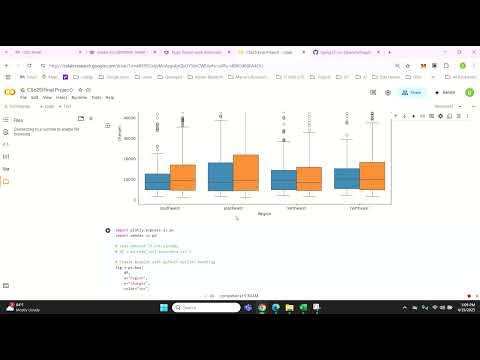

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo("0l7gyXSYOas", width=800, height=400)